In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Start by importing the data

In [2]:
iris = pd.read_csv('iris-data.csv')
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##### Let's check the types and nan values of the dataset

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
'''We can observe that de types are the ones there should be in each column.
We can observe 5 nan values in the petal_width_cm column.'''

'We can observe that de types are the ones there should be in each column.\nWe can observe 5 nan values in the petal_width_cm column.'

Let's see the nan values


In [5]:
iris.loc[iris.petal_width_cm.isnull() == True]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


As we do not really know how to obtain the width, we can interpolate the data because we have a proper dataset of 150 


In [6]:
 iris = iris.interpolate()

##### See the describe data

In [7]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.202000
std,1.312781,0.433123,1.764420,0.765447
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### plot histogram of each variable

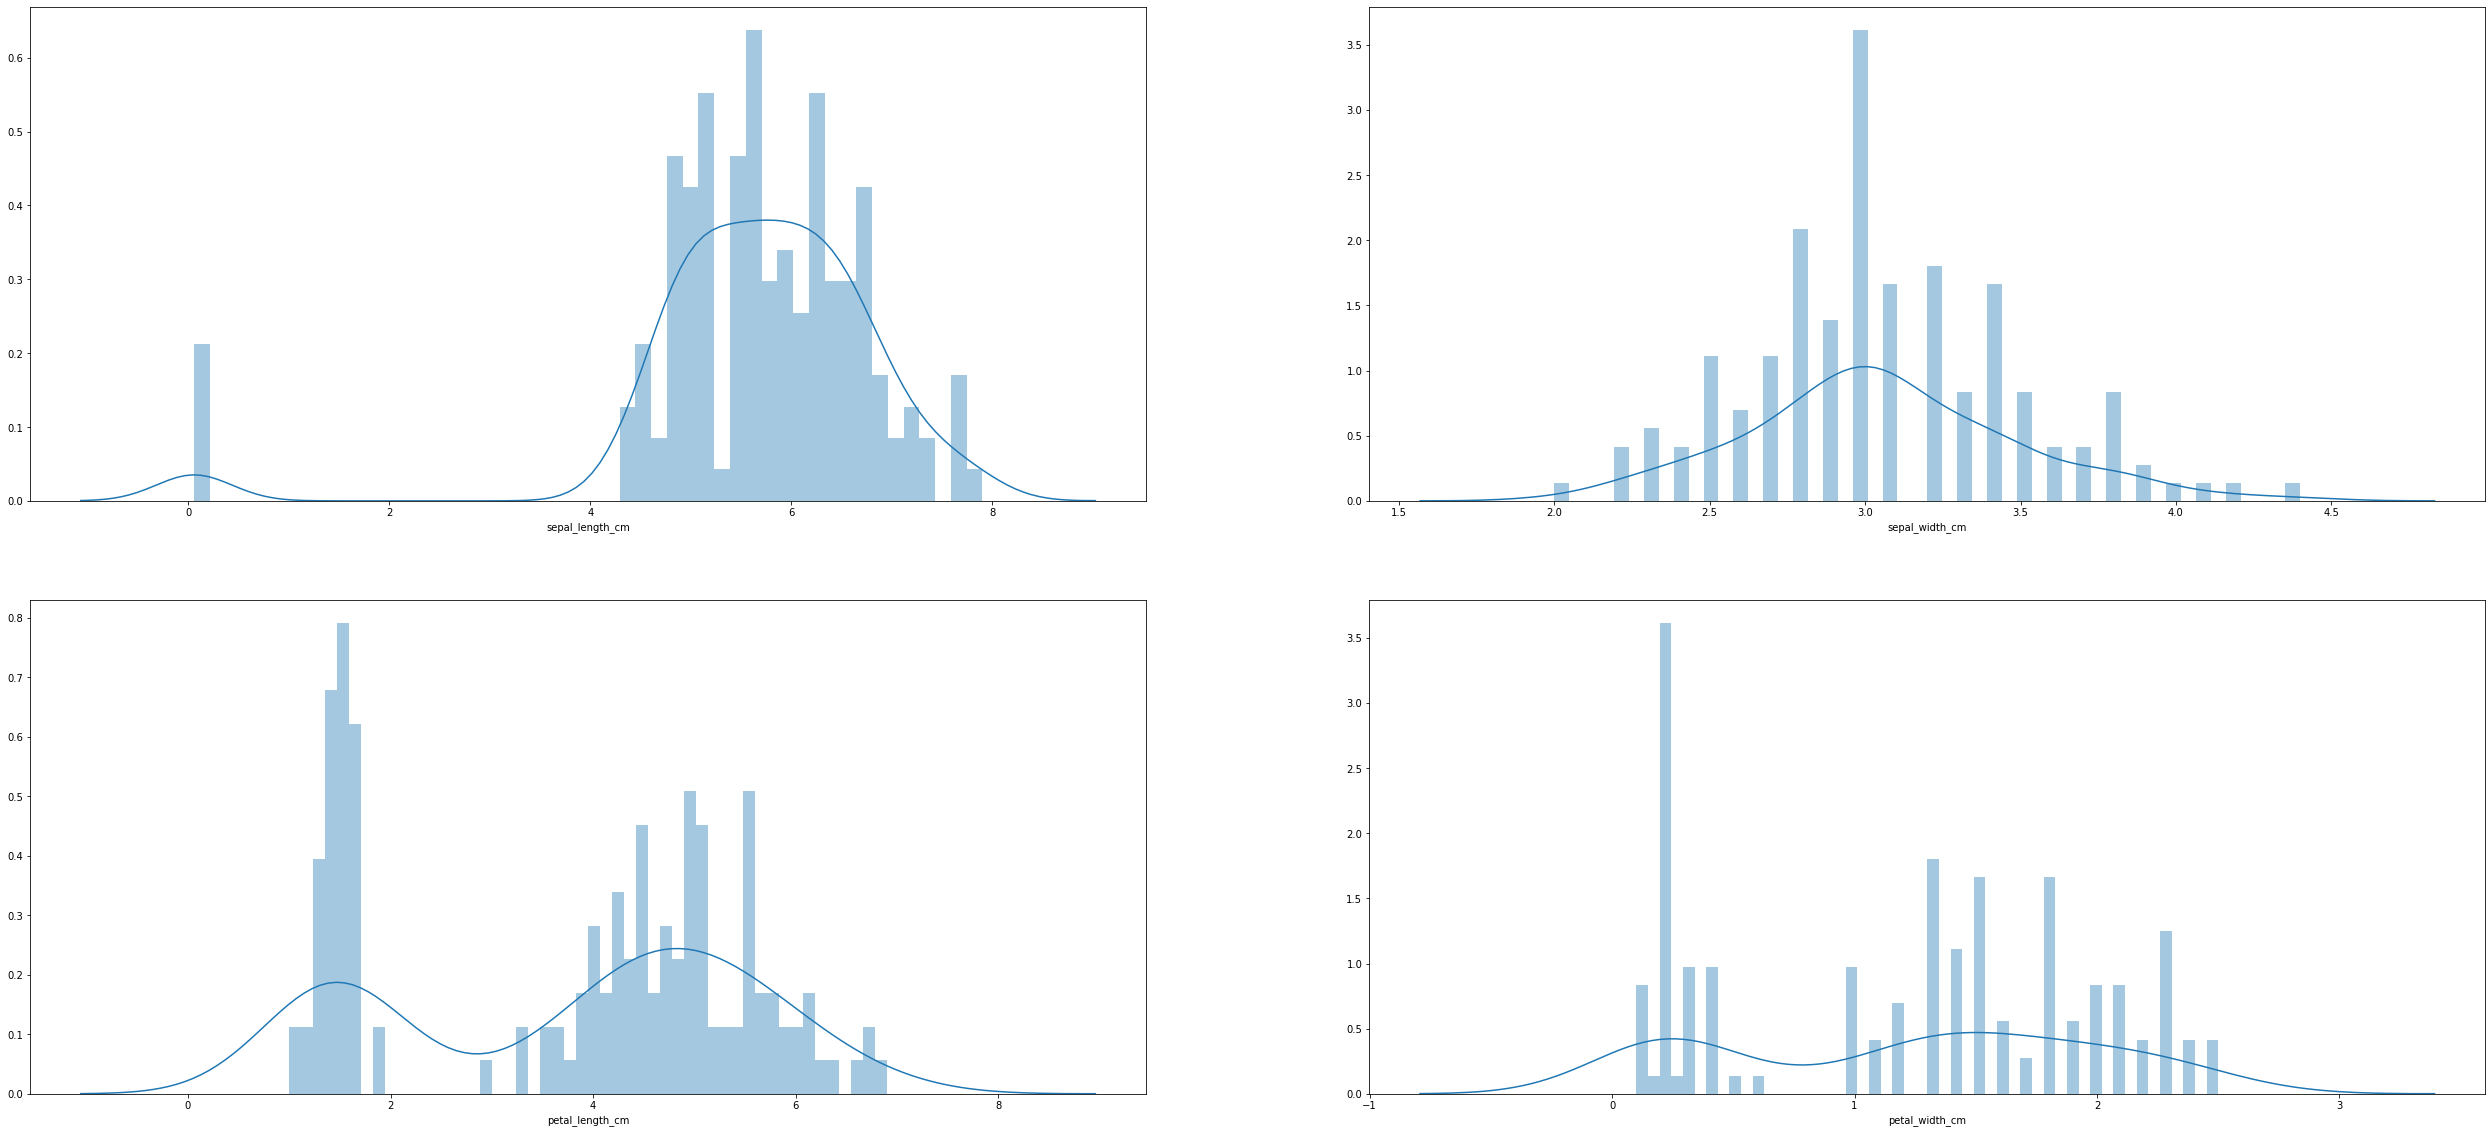

In [8]:
f,((ax1,ax2),
   (ax3,ax4)) = plt.subplots(2, 2, figsize=(44,20))

sns.distplot(iris.sepal_length_cm, bins=50, ax=ax1)
sns.distplot(iris.sepal_width_cm, bins=50,ax=ax2)
sns.distplot(iris.petal_length_cm, bins=50,ax=ax3)
sns.distplot(iris.petal_width_cm, bins=50,ax=ax4)
plt.show()

### We can observe some extrange tendencies in the petal, so we are going to boxplot them

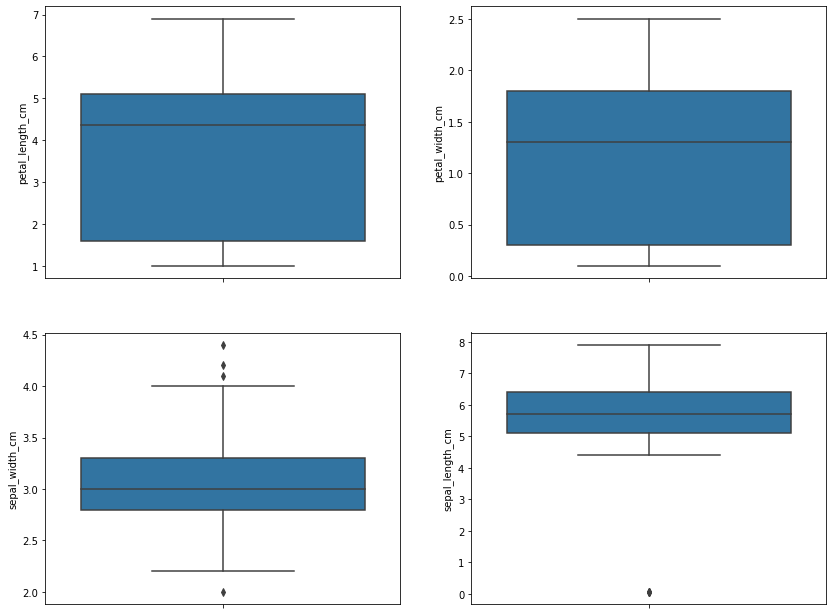

In [9]:
f,((ax1,ax2),
   (ax3,ax4)) = plt.subplots(2, 2, figsize=(14,11))


sns.boxplot(y=iris.petal_length_cm, ax=ax1)
sns.boxplot(y=iris.petal_width_cm, ax=ax2)
sns.boxplot(y=iris.sepal_width_cm, ax=ax3)
sns.boxplot(y=iris.sepal_length_cm, ax=ax4)

We can observe some extrem values at the sepal length and the width. Let's see them:


In [10]:
toolow = iris.loc[iris.sepal_length_cm <3]

Because this outliers are complete out of the rank, were are going to drop them down.

In [11]:
iris_clean = iris.drop(toolow.index,axis = 0)
iris_clean

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
iris_clean.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.837241,3.068276,3.746897,1.200000
std,0.813936,0.431680,1.790564,0.776706
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### We just created new data (iris_clean) and see the object variable

In [13]:
iris_clean['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

#### We can observe some name which are repite and wrong spell it. Create dummy columns for each type of columns and then rename the new columns

In [14]:
iris_type = ['setos', 'versicolor','Iris-virginica']

for x in iris_type:
    iris_clean[x] = 0

In [15]:
for x in iris_type:
    iris_clean[x] = iris_clean['class'].str.contains(x).astype(int)
iris_clean

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,setos,versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,6.3,2.5,5.0,2.3,Iris-virginica,0,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


### Let's Rename the columns 


In [22]:
iris_clean = iris_clean.rename(columns={'setos':'Iris-setosa','versicolor':'Iris-versicolor'})
iris_clean

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,6.3,2.5,5.0,2.3,Iris-virginica,0,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [25]:
iris_clean.drop(['class'],axis=1, inplace=True)


KeyError: "['class'] not found in axis"

In [26]:
iris_clean

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,2.3,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [28]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.202000
std,1.312781,0.433123,1.764420,0.765447
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# now, let's start with the corr and the regretion of the variables

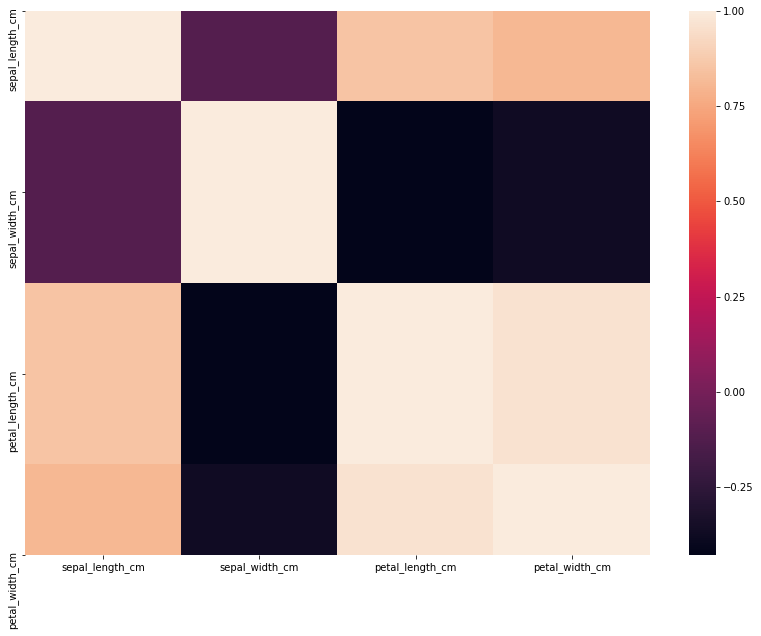

In [42]:
corr = iris_clean[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].corr()

f,ax = plt.subplots(1,1,figsize=(14,10))
sns.heatmap(corr, xticklabels=corr,yticklabels=corr,ax=ax)

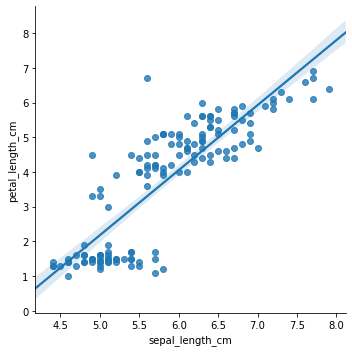

In [34]:
petal= sns.lmplot('sepal_length_cm','petal_length_cm',fit_reg=True, data = iris_clean)


### We can observe a positive relation between the two viables